In [33]:
from neuron import h
import numpy as np
import pylab as plt
plt.ion()

In [34]:
!nrnivmodl > null.out

# Model setting

In [35]:
soma = h.Section(name='soma')
soma.L = 10
soma.diam = 10
soma.insert('sodium')
soma.insert('potassium')
soma.insert('leak')

soma

In [36]:
tstop = 500
onset = 100
dur = tstop - 2 * onset

## Define inputs

In [44]:
# step current
iclamp = h.IClamp(soma(0.5))
iclamp.delay = onset
iclamp.dur = dur
iclamp.amp = 0 # 0.9

# ramp current
ramp_input = h.ramp(soma(0.5))
ramp_input.delay = onset
ramp_input.dur = dur
ramp_input.amp0 = 0.006
ramp_input.amp1 = 0.018
ramp_input.tpeak = 10

# record voltage and time
v = h.Vector().record(soma(0.5)._ref_v)             # Membrane potential vector
t = h.Vector().record(h._ref_t)                     # Time stamp vector

In [45]:
def ramp_func(t, ramp):
    """ramp current"""
    if (t <(ramp.delay+ramp.dur)) & (t > ramp.delay):
        if t< (ramp.delay+ramp.tpeak):
            i = ramp.amp0 + (ramp.amp1-ramp.amp0)/ramp.tpeak*(t-ramp.delay)
        else:
            i = ramp.amp1
    else:
        i = 0
    return i

# Run simulation

In [46]:
h.load_file('stdrun.hoc')
h.finitialize(-65)
h.tstop = tstop
h.run()

0.0

In [47]:
v_arr = np.array(v)
t_arr = np.array(t)
i_rp = []
for t in t_arr:
    i_rp.append(ramp_func(t, ramp_input))

In [ ]:
plt.figure()
plt.subplot(211)
plt.plot(t_arr, i_rp)
plt.subplot(212)
plt.plot(t_arr, v_arr)

Text(0, 0.5, 'v (mV)')

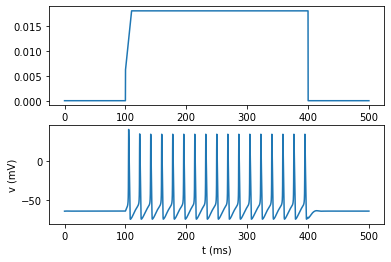

In [48]:
plt.xlabel('t (ms)')
plt.ylabel('v (mV)')